In [1]:
import cProfile
import profile
import time

import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from NeuralTract import NeuralTract
from SynapsesFactory import SynapsesFactory

/home/renato/intel/intelpython27/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [7]:
np.__config__.show()

lapack_opt_info:
    libraries = ['mkl_rt', 'mkl_rt', 'pthread']
    library_dirs = ['/localdisk/cnl_2017/mkl/lib/intel64']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/localdisk/cnl_2017/mkl/include']
blas_opt_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/localdisk/cnl_2017/mkl/lib/intel64']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/localdisk/cnl_2017/mkl/include']
openblas_lapack_info:
  NOT AVAILABLE
lapack_mkl_info:
    libraries = ['mkl_rt', 'mkl_rt', 'pthread']
    library_dirs = ['/localdisk/cnl_2017/mkl/lib/intel64']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/localdisk/cnl_2017/mkl/include']
blas_mkl_info:
    libraries = ['mkl_rt', 'pthread']
    library_dirs = ['/localdisk/cnl_2017/mkl/lib/intel64']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['/localdisk/cnl_2017/mkl/include']
mkl_in

In [2]:
conf = Configuration('confTest.rmto')

In [3]:
pools = []
pools.append(MotorUnitPool(conf, 'SOL'))
pools.append(NeuralTract(conf, 'CM_ext'))

3586.0
Motor Unit Pool SOL built
Descending Command CM_ext built


In [4]:
Syn = SynapsesFactory(conf, pools)
del Syn

All the 96269 synapses were built


In [5]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [6]:
tic = time.clock()
for i in xrange(0,len(t)-1): 
    pools[1].atualizePool(t[i])
    pools[0].atualizeMotorUnitPool(t[i], 0.323)
    toc = time.clock()
print str(toc - tic) + ' seconds'

296.508557 seconds


[ 2860.02638298]


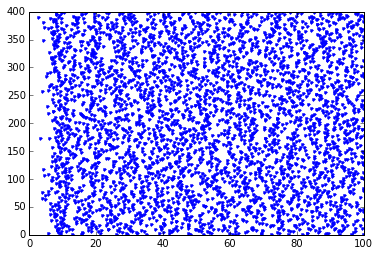

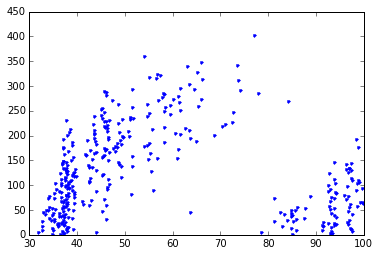

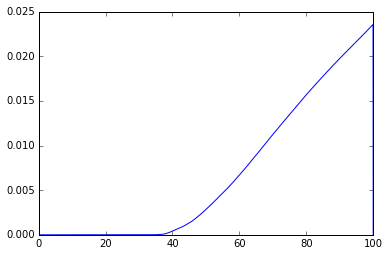

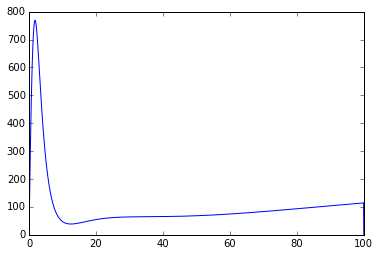

In [11]:
pools[1].listSpikes()
plt.figure()
plt.plot(pools[1].poolTerminalSpikes[:, 0],
    pools[1].poolTerminalSpikes[:, 1]+1, '.')

pools[0].listSpikes()
    
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
    pools[0].poolTerminalSpikes[:, 1]+1, '.')

print pools[0].Muscle.maximumActivationForce

plt.figure()
plt.plot(t, pools[0].Muscle.activationTypeI, '-')

plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')

plt.show()

$\frac{s}{2}$